In [223]:
#Import packages and data into pd dataframe 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from datetime import datetime 
from statsmodels.formula.api import ols
import scipy.stats as stats
kc_data = pd.read_csv('kc_house_data.csv')

In [224]:
#Inspect data; identify variable types 
kc_data.head()
kc_data.info()
kc_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


***CLEAN DATA***

In [225]:
#Changing objects into int/float datatypes  
kc_data['date'] = pd.to_datetime(kc_data['date'])
#Removing duplicates 
kc_data.duplicated(subset=['id']).any()
pd.concat(g for _, g in kc_data.groupby('id') if len(g) > 1)
kc_data.drop_duplicates(subset='id', keep='last', inplace=True)
#Check to ensure duplicated removed
kc_data.duplicated(subset=['id']).any()

False

In [226]:
#Replace NaN values in waterfront column with mean value 
kc_data['waterfront'].fillna(0, inplace=True)
#Replace NAN values in view column with mean value 
mean_view = kc_data.view.mean()
kc_data['view'].fillna(mean_view, inplace=True)
#Replace NAN values in yr_renovated column with 0 as opposted to mean value as mean of year renovated 
#in NAN set would not be representative of the data
kc_data['yr_renovated'].fillna(0, inplace=True)
#Check for types of entries in sqft_basement and replace ?
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [227]:
#Clean sqft_basement column 
kc_data['sqft_basement'].replace('?',0, inplace = True)
kc_data['sqft_basement'].value_counts()
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(float).astype(int)

In [228]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null int64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.6 M

In [229]:
#Drop outlier 33 bedrooms which is > 1.5IQR
kc_data.loc[kc_data['bedrooms'] == 33]
kc_data.drop([15856], axis=0, inplace = True)
#Ensure that removed 
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.141900e+04,2.141900e+04,21419.000000,21419.000000,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.00000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000
mean,4.581042e+09,5.418568e+05,3.372566,2.118446,2083.154256,1.512846e+04,1.496008,0.006816,0.234688,3.41071,7.662823,1791.205285,285.923292,1971.094122,68.959942,98077.873197,47.560191,-122.213778,1988.414819,12776.095196
std,2.876790e+09,3.675649e+05,0.903013,0.768734,918.824411,4.153172e+04,0.540083,0.082281,0.765348,0.64996,1.171990,828.696414,440.018646,29.387365,364.560504,53.478453,0.138590,0.140792,685.538299,27346.204562
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.00000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123375e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.00000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.00000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.00000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.000000,47.678050,-122.125000,2370.000000,10086.500000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.00000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1]:
# #dram hisgtogram - view distribution of the data 
# #for column in kc_data:
#     kc_data[column].plot.hist(normed=True, label = column+' histogram')
#     kc_data[column].plot.kde(label =column+' kde')
#     plt.legend()
#     plt.show()

IndentationError: unexpected indent (<ipython-input-1-366b112d3d72>, line 3)

In [ ]:
#CHECK linearity of variables 
# fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
# for idx, variable in enumerate(['', '', '']):
#     data.plot(kind='scatter', x=, y='sales', ax=axs[idx])
# plt.legend()
# plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     35.10
Date:                Fri, 21 Jun 2019   Prob (F-statistic):           2.88e-29
Time:                        09:50:33   Log-Likelihood:            -3.0480e+05
No. Observations:               21419   AIC:                         6.096e+05
Df Residuals:                   21414   BIC:                         6.096e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.495e+05   6.92e+04      5.047      0.000    2.14e+05    4.85e+05
condition_dummies[0] -1.547e+04    7.5e+04     -0.206      0.837   -1.62e+05    1.32e+05
condition_dummies[1]  1.945e+05   6.93e+04      2.806      0.005    5.86e+04     3.3e+05
condition_dummies[2]  1.728e+05   6.94e+04      2.490      0.013    3.68e+04    3.09e+05
condition_dummies[3]  2.638e+05   6.98e+04      3.778      0.000    1.27e+05    4.01e+05
==============================================================================
Omnibus:                    19063.559   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1159276.053
Skew:                           4.054   Prob(JB):                         0.00
Kurtosis:                      38.117   Cond. No.                         76.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

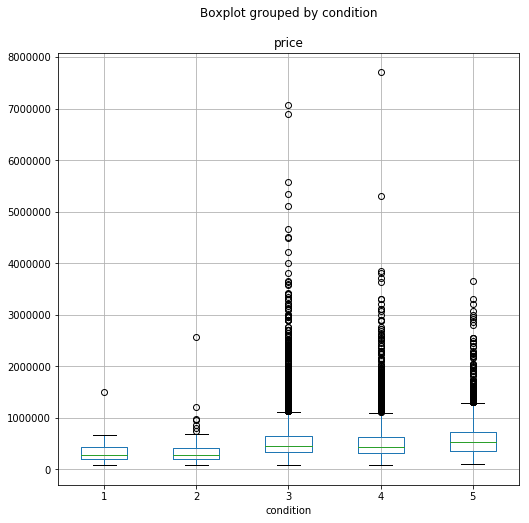

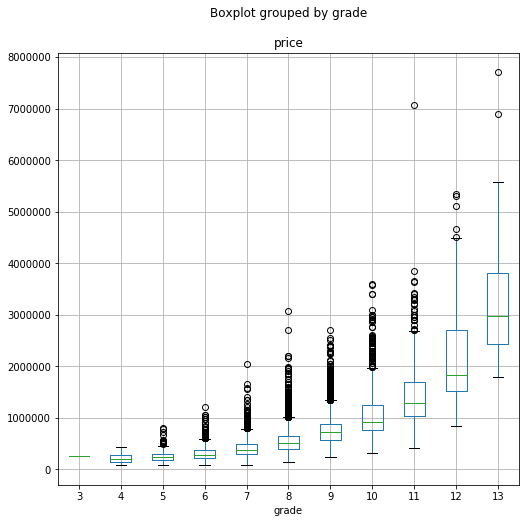

In [245]:
#Changing categorical variables to numerical variables 
kc_data['condition'].unique()
#Create new columns of dummy variable; drop first value so we have n-1 values 
condition_dummies = pd.get_dummies(kc_data['condition'],prefix = 'condition', drop_first=True)
grade_dummies = pd.get_dummies(kc_data['grade'],prefix = 'grade', drop_first=True)
#waterfront_dummies = pd.get_dummies(kc_data['waterfront'],prefix = 'waterfront', drop_first=True)
#Check on distribution of dummies
condition_dummies.head(3)
#Visualize dummies  
kc_data.boxplot('price',by = 'condition',figsize = (8,8))
kc_data.boxplot('price',by = 'grade',figsize = (8,8))
#Look at distribution and statistics by groupby
kc_data.groupby('condition').price.describe()
#Add dummy variables to df, remove categorical variables 
kc_dummies = pd.concat([kc_data, condition_dummies, grade_dummies, sqft_basement_dummies], axis = 1)
kc_dummies.drop(['condition','grade'],axis=1, inplace=True);
#Use temporary regression to visualize data
temp_reg_condition = ols(formula = 'price~condition_dummies',data=kc_dummies).fit()
temp_reg_condition.summary()

In [235]:
kc_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Columns: 335 entries, id to sqft_basement_4820
dtypes: datetime64[ns](1), float64(7), int64(10), uint8(317)
memory usage: 9.6 MB


***RUN MODEL***

In [247]:
f = "price~bedrooms+bathrooms+sqft_living+lat+long+yr_built+sqft_lot+floors+view+sqft_above+yr_renovated+waterfront+sqft_living15+sqft_lot15+sqft_basement+condition_dummies+grade_dummies"
regression_kc = ols(formula= f, data=kc_dummies).fit()
regression_kc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1952.
Date:                Fri, 21 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:52:02   Log-Likelihood:            -2.9101e+05
No. Observations:               21419   AIC:                         5.821e+05
Df Residuals:                   21389   BIC:                         5.823e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.648e+07   1.54e+06    -23.739      0.000   -3.95e+07   -3.35e+07
bedrooms             -2.069e+04   1950.729    -10.604      0.000   -2.45e+04   -1.69e+04
bathrooms              4.55e+04   3161.425     14.392      0.000    3.93e+04    5.17e+04
sqft_living             92.5318     17.340      5.336      0.000      58.545     126.519
lat                   5.748e+05   1.01e+04     56.937      0.000    5.55e+05    5.95e+05
long                 -1.083e+05   1.15e+04     -9.439      0.000   -1.31e+05   -8.58e+04
yr_built             -2023.9008     70.225    -28.820      0.000   -2161.546   -1886.255
sqft_lot                 0.1177      0.046      2.561      0.010       0.028       0.208
floors                1.962e+04   3501.748      5.604      0.000    1.28e+04    2.65e+04
view                  4.592e+04   2033.126     22.587      0.000    4.19e+04    4.99e+04
sqft_above              40.5334     17.350      2.336      0.019       6.527      74.540
yr_renovated            36.1777      3.837      9.430      0.000      28.658      43.698
waterfront            6.019e+05   1.74e+04     34.584      0.000    5.68e+05    6.36e+05
sqft_living15           33.2700      3.328      9.996      0.000      26.746      39.794
sqft_lot15              -0.3985      0.070     -5.669      0.000      -0.536      -0.261
sqft_basement           38.1937     17.174      2.224      0.026       4.532      71.856
condition_dummies[0]   4.98e+04   3.95e+04      1.259      0.208   -2.77e+04    1.27e+05
condition_dummies[1]  5.386e+04   3.67e+04      1.466      0.143   -1.81e+04    1.26e+05
condition_dummies[2]  9.223e+04   3.67e+04      2.510      0.012    2.02e+04    1.64e+05
condition_dummies[3]  1.311e+05    3.7e+04      3.547      0.000    5.86e+04    2.03e+05
grade_dummies[0]     -1.669e+05   1.96e+05     -0.850      0.395   -5.52e+05    2.18e+05
grade_dummies[1]     -1.853e+05   1.93e+05     -0.960      0.337   -5.64e+05    1.93e+05
grade_dummies[2]      -1.64e+05   1.93e+05     -0.851      0.395   -5.42e+05    2.14e+05
grade_dummies[3]     -1.194e+05   1.93e+05     -0.619      0.536   -4.97e+05    2.58e+05
grade_dummies[4]     -5.847e+04   1.93e+05     -0.303      0.762   -4.36e+05     3.2e+05
grade_dummies[5]      6.026e+04   1.93e+05      0.312      0.755   -3.18e+05    4.38e+05
grade_dummies[6]      2.223e+05   1.93e+05      1.152      0.249   -1.56e+05    6.01e+05
grade_dummies[7]      4.706e+05   1.93e+05      2.434      0.015    9.16e+04    8.49e+05
grade_dummies[8]       9.43e+05   1.94e+05      4.852      0.000    5.62e+05    1.32e+06
grade_dummies[9]      2.119e+06   2.01e+05     10.550      0.000    1.73e+06    2.51e+06
==============================================================================
Omnibus:                    14452.434   Durbin-Watson:             

***QQ PLOT TO DETERMINE NORMALITY OF DISTRIBUTION OF DATA SET - SEE THAT DATASET IS NOT NORMALLY DISTRIBUTED***...SEE HOW THE DOTS FIT A 45DEGREE LINE 

/Users/bridgetboakye/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


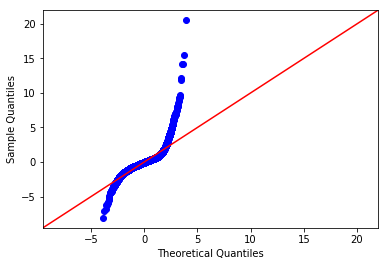

In [261]:
fig = sm.graphics.qqplot(regression_kc.resid, dist=stats.norm, line='45', fit=True)
fig.show()

In [269]:
#We notice that our data is not normally distributed from the QQ -plots so will need to transform the dataset

***CHECK MULTICOLLINEARITY***

In [262]:
corr = kc_data.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018440,0.001868,0.004326,-0.013469,-0.132657,0.018108,-0.003631,0.010898,-0.024217,0.006450,-0.011827,-0.004840,0.021143,-0.010864,-0.007918,-0.002733,0.019307,-0.003917,-0.139442
price,-0.018440,1.000000,0.316917,0.525225,0.701306,0.088792,0.254989,0.264916,0.393043,0.034194,0.666848,0.604448,0.321260,0.051023,0.118281,-0.051175,0.306434,0.019836,0.583817,0.082049
bedrooms,0.001868,0.316917,1.000000,0.528912,0.594217,0.033634,0.183556,-0.002133,0.080833,0.022794,0.367743,0.493560,0.303446,0.160352,0.018193,-0.159630,-0.012957,0.137004,0.406232,0.031782
bathrooms,0.004326,0.525225,0.528912,1.000000,0.755519,0.087775,0.501795,0.063633,0.185012,-0.129326,0.665583,0.686325,0.278159,0.506244,0.047682,-0.203876,0.023165,0.223795,0.569446,0.087754
sqft_living,-0.013469,0.701306,0.594217,0.755519,1.000000,0.172582,0.352856,0.104736,0.281036,-0.061628,0.762474,0.876534,0.428020,0.316633,0.050847,-0.198986,0.050762,0.240197,0.756184,0.183832
sqft_lot,-0.132657,0.088792,0.033634,0.087775,0.172582,1.000000,-0.005571,0.021429,0.075432,-0.009145,0.113651,0.183204,0.014846,0.052305,0.004989,-0.129418,-0.085815,0.230261,0.143798,0.717742
floors,0.018108,0.254989,0.183556,0.501795,0.352856,-0.005571,1.000000,0.020575,0.027146,-0.266796,0.458079,0.522733,-0.242130,0.488917,0.003133,-0.058513,0.048941,0.124781,0.279041,-0.011380
waterfront,-0.003631,0.264916,-0.002133,0.063633,0.104736,0.021429,0.020575,1.000000,0.381806,0.016619,0.082903,0.071735,0.083320,-0.024846,0.074095,0.029185,-0.012263,-0.037887,0.083919,0.030652
view,0.010898,0.393043,0.080833,0.185012,0.281036,0.075432,0.027146,0.381806,1.000000,0.044773,0.247786,0.165314,0.270485,-0.056222,0.089900,0.087427,0.005656,-0.079119,0.277728,0.073467
condition,-0.024217,0.034194,0.022794,-0.129326,-0.061628,-0.009145,-0.266796,0.016619,0.044773,1.000000,-0.150465,-0.161406,0.168940,-0.365092,-0.056250,0.004319,-0.015673,-0.107076,-0.095162,-0.003417


In [263]:
corr[abs(kc_data.corr() > 0.75)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.000000,0.755519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755519,1.000000,NaN,NaN,NaN,NaN,NaN,0.762474,0.876534,NaN,NaN,NaN,NaN,NaN,NaN,0.756184,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


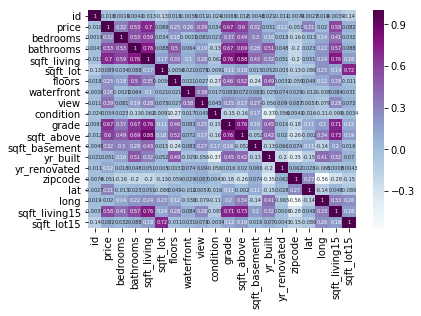

In [268]:
sns.heatmap(corr,cmap = 'BuPu', annot = True, annot_kws ={'size':5})

***We notice that there are collinear variables such in our data so we will remove them from our model***

In [273]:
pd.plotting.scatter_matrix(kc_dummies[columns], figsize=(10,12));

NameError: name 'columns' is not defined

In [ ]:
non_normal = ['displ', 'horsepower', 'weight']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

***VISUALIZE THE ERROR TERM FOR VARIANCE AND HETEROSCEDASTICITY***

In [260]:
# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]
# for idx, val in enumerate(['bedrooms','bathrooms']):
#     print ("Kings County DataSet - Regression Analysis and Diagnostics for formula: price~" + val)
#     print ("-------------------------------------------------------------------------------------")

#     f = 'price~' + val
   
#     model = ols(formula=f, data=kc_dummies).fit()
    
#     X_new = pd.DataFrame(kc_dummies{val: [data[val].min(), data[val].max()]});
#     preds = model.predict(X_new)
#     data.plot(kind='scatter', x=val, y='price');
#     plt.plot(X_new, preds, c='red', linewidth=2);
#     plt.show()
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    
#     fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
#     plt.show()
    
#     results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])